In [37]:
from qiskit import QuantumCircuit, assemble, transpile

import sys
sys.path.append('..')
import utils.backends as backends
import utils.utils as utils
import utils.measurement_filtering as measurement_filtering

In [38]:
def dense_coding_base_circ(i):
    qnumber=4
    circ = QuantumCircuit(qnumber, qnumber)

    if i == 1 or i == 3:
        circ.x(2)

    if i == 2 or i == 3:
        circ.x(3)

    circ.h(0)

    circ.cx(0, 1)

    circ.cx(3, 0)
    circ.cz(2, 0)

    circ.cx(0, 1)
    circ.h(0)

    circ.measure(range(qnumber), range(qnumber))
    return circ

In [39]:
def build_and_run_circ(circuit, backend, noise_model = None):
    t_qc = transpile(circuit, backend)
    qobj = assemble(t_qc, shots=10000)
    results = backend.run(qobj, noise_model=noise_model, shots=10000).result()
    return results

In [40]:
# backend_model = backends.aer_simulator_clean
# backend_model = backends.aer_simulator_clean
# backend_model = backends.qasm_simulator_noise
backend_model = backends.aer_real_noise

In [41]:
circuit = [dense_coding_base_circ(i) for i in range(4)]

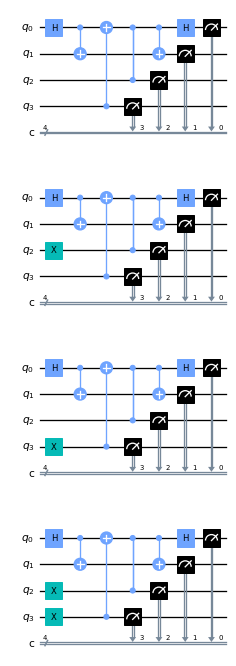

In [42]:
utils.draw_ciurcuits(circuit)

Underfull Vlist: [Vlist <2.47 3.16 0.00 0.00> Hrule Glue [Hlist <2.47 3.00 0.00 0.00> Hbox [Hlist <1.80 3.00 0.00 0.00> `X` k0.05] Hbox]]
Underfull Vlist: [Vlist <2.44 3.15 0.00 0.00> Hrule Glue [Hlist <2.44 3.00 0.00 0.00> Hbox [Hlist <1.80 3.00 0.00 0.00> `X` k0.05] Hbox]]
Underfull Vlist: [Vlist <2.47 3.16 0.00 0.00> Hrule Glue [Hlist <2.47 3.00 0.00 0.00> Hbox [Hlist <1.80 3.00 0.00 0.00> `X` k0.05] Hbox]]
Underfull Vlist: [Vlist <2.44 3.15 0.00 0.00> Hrule Glue [Hlist <2.44 3.00 0.00 0.00> Hbox [Hlist <1.80 3.00 0.00 0.00> `X` k0.05] Hbox]]


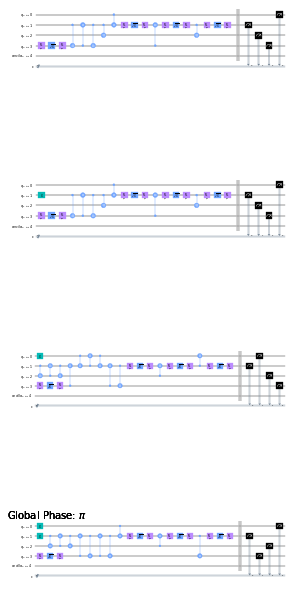

In [43]:
t_qc = transpile(circuit, backend_model.backend, backend_model.basis_gates, coupling_map=backend_model.coupling_map)
utils.draw_ciurcuits(t_qc)

In [44]:
results = backend_model.backend.run(assemble(t_qc, shots=1000), noise_model=backend_model.noise_model, shots=1000).result()
counts = results.get_counts()

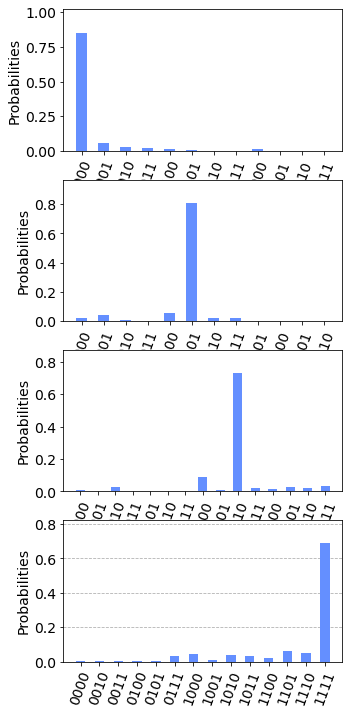

In [45]:
utils.plot_histograms(counts, bar_labels=False)

In [46]:
measurement_filter = measurement_filtering.get_measurement_filter(4, backend_model)

In [47]:
mitigated_results = measurement_filter.apply(results)
mitigated_counts = mitigated_results.get_counts()

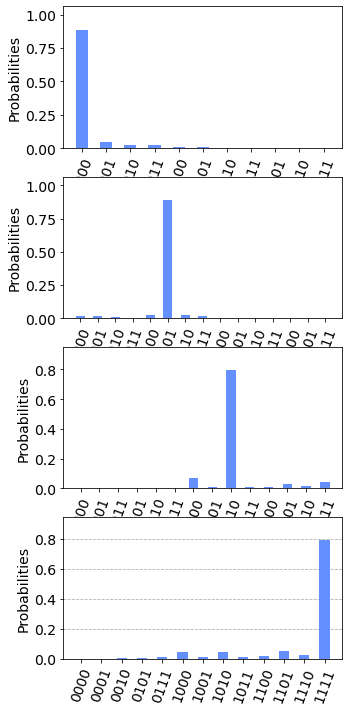

In [48]:
utils.plot_histograms(mitigated_counts, bar_labels=False)